In [2]:
import cPickle as pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
DATA = "/deep/group/med/mitdb"

# Explore the data

In [3]:
wave = np.load(os.path.join(DATA, "100.npy"))
print "Wave data: ", wave.shape, "-- samples x (sample number, channel 1, channel2)"
with open(os.path.join(DATA, "100.pkl"), 'r') as fid:
    labels = pickle.load(fid)
print "Labels: ", len(labels)
print labels[0], " -- timestamp, sample id, beat label, rhtyhm label"

Wave data:  (650000, 3) -- samples x (sample number, channel 1, channel2)
Labels:  2274
('0:00.050', 18, '+', '(N')  -- timestamp, sample id, beat label, rhtyhm label


## Plot some stuff

Labels are supposed to be at the peak of R


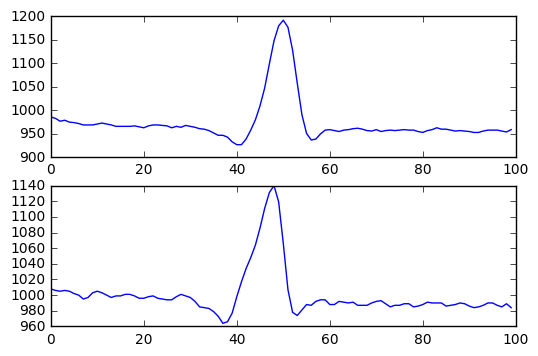

In [4]:
print "Labels are supposed to be at the peak of R"
f, ax = plt.subplots(2)
# let's plot the two channels corresponding to a normal beat
mid = labels[1][1]
for i in range(2):
 ax[i].plot(wave[mid - 50:mid + 50, i+1])

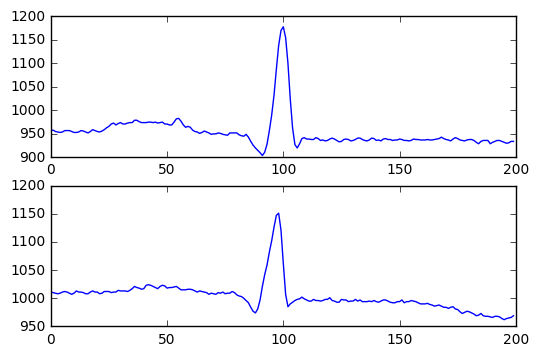

In [5]:
f, ax = plt.subplots(2)
# let's plot the two channels corresponding to a normal beat
start = labels[50][1]
for i in range(2):
    ax[i].plot(wave[start-100:start+100, i+1])

Can probably segment at the mid-point between two labels


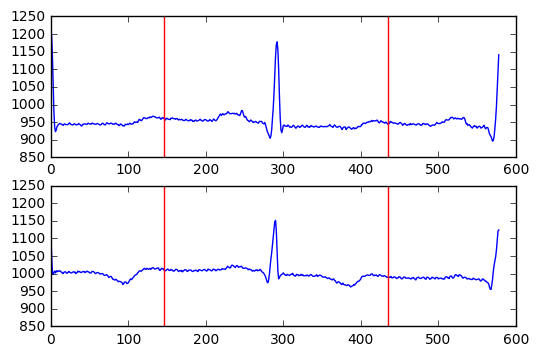

In [6]:
f, ax = plt.subplots(2)
# let's plot the two channels corresponding to a normal beat
r_right = labels[51][1]
r_mid = labels[50][1]
r_left = labels[49][1]
mid_right = (r_right + r_mid) / 2 - r_left
mid_left = (r_mid + r_left) / 2 - r_left
for i in range(2):
    ax[i].plot(wave[r_left:r_right, i+1])
    line = range(850, 1250)
    ax[i].plot([mid_right]*len(line), line, color='red')
    ax[i].plot([mid_left]*len(line), line, color='red')

print "Can probably segment at the mid-point between two labels"

## Some label statistics

In [7]:
import glob
from collections import Counter
label_files = glob.glob(os.path.join(DATA, "*.pkl"))
def read_label(fn):
    with open(fn, 'r') as fid:
        labels = pickle.load(fid)
    return labels
all_labels = [list(l) for fn in label_files for l in read_label(fn)]

Number of labels (this would be the same as the number of beats): 112646
Number of unique beats: 23
Number of unique rhythms 18


<Container object of 18 artists>

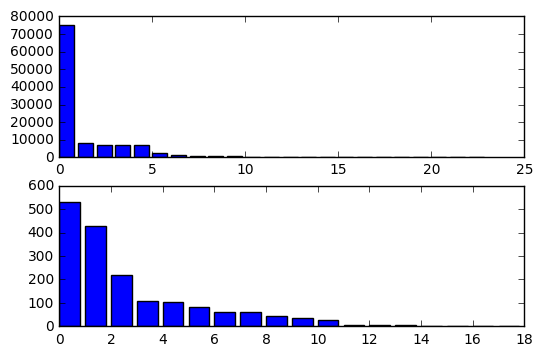

In [8]:
print"Number of labels (this would be the same as the number of beats):", len(all_labels)
beats = Counter(l[2] for l in all_labels).most_common()
# remove the None rhythm label, this is just a place holder
# for when there is no transition.
rhythms = Counter(l[-1] for l in all_labels).most_common()[1:] 
print "Number of unique beats:", len(beats)
print "Number of unique rhythms", len(rhythms)
f, (ax1, ax2) = plt.subplots(2);
ax1.bar(range(len(beats)), [c for _, c in beats])
ax2.bar(range(len(rhythms)), [c for _, c in rhythms])

Log plots. Histogram of beats and rhtyhms respectively.


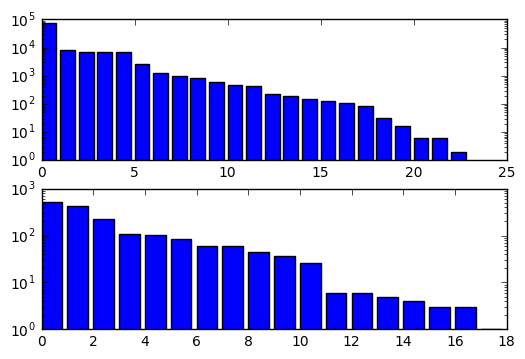

In [9]:
print "Log plots. Histogram of beats and rhtyhms respectively."
f, (ax1, ax2) = plt.subplots(2)
ax1.bar(range(len(beats)), [c for _, c in beats])
ax1.set_yscale("log")
ax2.bar(range(len(rhythms)), [c for _, c in rhythms])
ax2.set_yscale("log")

For the rhythms we were viewing transitions. We can also view beat level rhythm labels though I'm not sure this makes sense as a rhythm might not be a function of a beat.


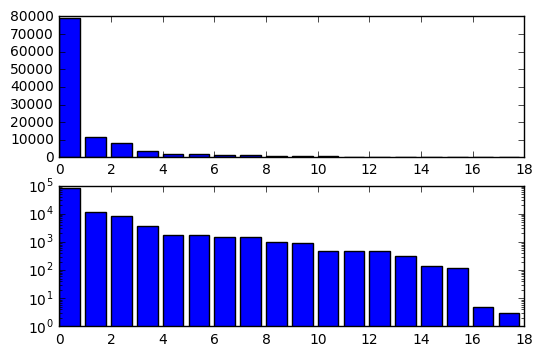

In [10]:
# Fill in empty rhythm labels with the label of the previous transition.
for e, l in enumerate(all_labels):
    if e == 0: continue
    l[-1] = all_labels[e-1][-1] if l[-1] == None else l[-1]
rhythms = Counter(l[-1] for l in all_labels).most_common()
f, (ax1, ax2) = plt.subplots(2);
ax1.bar(range(len(rhythms)), [c for _, c in rhythms])
ax2.bar(range(len(rhythms)), [c for _, c in rhythms])
ax2.set_yscale("log")

In [11]:
for rhythm, count in rhythms:
    print rhythm, count

(N 78929
(AFIB 11675
(P 8064
(B 3542
(SBR 1816
MISSB 1727
(AFL 1462
(T 1453
(PREX 1020
TS 922
(SVTA 495
(VFL 484
(VT 463
(NOD 321
(IVR 143
(AB 122
(BII 5
PSE 3


In [12]:
for beat, count in beats:
    print beat, count

N 75052
L 8075
R 7259
V 7130
/ 7028
A 2546
+ 1290
f 982
F 803
~ 616
! 472
" 437
j 229
x 193
a 150
| 132
E 106
J 83
Q 33
e 16
[ 6
] 6
S 2


In [18]:
diffs = []
for e, l in enumerate(all_labels):
    if e == 0: continue
    diff = l[1] - all_labels[e-1][1]
    if diff < 0: continue # deal with example transitions
    diffs.append(diff)
print "Mean: ", np.mean(diffs)
print "Std: ", np.std(diffs)
print "Min - Max: ", min(diffs), max(diffs)

Mean:  277.002948543
Std:  81.8134199437
Min - Max:  6 2114
